# Procesamiento de Lenguaje Natural


**Pablo Martínez Olmos, Angel Navia Vázquez**

  * 1.1 (January 2025) Revised and updated version

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~navia/figures/logo_uc3m_foot.jpg' width=400 />

# Proyecto I: clasificación de textos

AUTOR(ES):

- **Jhonatan Barcos Gambaro (100548615)**



El objetivo es entrenar un clasificador para predecir si un titular de una noticia financiera puede tener una influencia positiva, negativa o neutra en el mercado financiero. La base de datos [Finantial Phrase Bank](https://www.researchgate.net/profile/Pekka-Malo/publication/251231364_FinancialPhraseBank-v10/data/0c96051eee4fb1d56e000000/FinancialPhraseBank-v10.zip) contiene cerca de 5000 oraciones extraídas de textos de noticias financieras:


>*This release of the financial phrase bank covers a collection of 4840 sentences. The selected collection of phrases was annotated by 16 people with adequate background knowledge on financial markets. Three of the annotators were researchers and the remaining 13 annotators were master’s students at Aalto University School of Business with majors primarily in finance, accounting, and economics.*
>
>*The objective of the phrase level annotation task was to classify each example sentence into a positive, negative or neutral category by considering only the information explicitly available in the given sentence. Since the study is focused only on financial and economic domains, the annotators were asked to consider the sentences from the view point of an investor only; i.e. whether the news may have positive, negative or neutral influence on the stock price. As a result, sentences which have a sentiment that is not relevant from an economic or financial perspective are considered neutral.*

Vamos a cargar la base de datos y proceder al pre-procesado. **Nota**: La codificación de estos textos es "ISO-8859-1", utilizar este dato en el momento de la lectura.

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos
from google.colab import drive
drive.mount("/content/drive")
MYDRIVE="/content/drive/MyDrive/2_CUATRI/NLP/LAB1/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Cargamos Finantial_Phrase_Bank.txt desde Drive con codificacion ISO-8859-1
with open(MYDRIVE + 'Finantial_Phrase_Bank.txt', encoding='ISO-8859-1') as file:
    lines = file.readlines()

print("\nLeídas {} líneas del fichero Finantial_Phrase_Bank.txt".format(len(lines)))

print("\nEsta es la primera frase, con la etiqueta tras el símbolo '@':\n")
print(lines[0])


Leídas 5717 líneas del fichero Finantial_Phrase_Bank.txt

Esta es la primera frase, con la etiqueta tras el símbolo '@':

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral



Vamos a separar la información en tres listas conteniendo el texto de cada opinión, la categoría de cada opinión (neutra, positiva, negativa) y la etiqueta correspondiente (0, 1, 3). Codifique las etiquetas con 0 (neutra), 1 (negativa) y 2 (positiva).

In [4]:
phrases = [line.split('@', 1)[0].strip() for line in lines] # Texto

opinions = [line.split('@', 1)[1].strip() if '@' in line else '' for line in lines] # Categoría de la opinión

labels = [0 if opinion == 'neutral' else 1 if opinion == 'negative' else 2 if opinion == 'positive' else None for opinion in opinions] # Etiquetas (codificación de opiones)

print("\nEstas son las 3 primeras frases:")
for k in range(3):
  print('-' * 50)
  print(phrases[k])
print("\nEstas son las 3 primeras opiniones y las correspondientes etiquetas:")
for k in range(3):
  print('-' * 5)
  print(opinions[k], labels[k])



Estas son las 3 primeras frases:
--------------------------------------------------
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
--------------------------------------------------
With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
--------------------------------------------------
For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .

Estas son las 3 primeras opiniones y las correspondientes etiquetas:
-----
neutral 0
-----
positive 2
-----
positive 2


Vamos a representar con un diagrama de barras la distribución de las etiquetas:

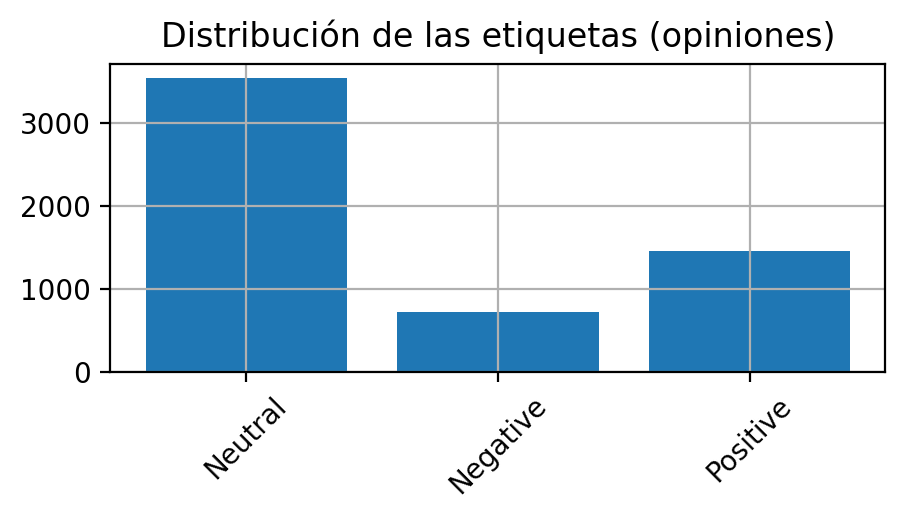

In [5]:
plt.figure(figsize=(5, 2))

#Contamos el numero de opiniones neutrales, negativas y positivas
num_neutral = labels.count(0)
num_negative = labels.count(1)
num_positive = labels.count(2)

#Creamos el diagrama de barras
ax = plt.gca()
ax.bar(['Neutral', 'Negative', 'Positive'], [num_neutral, num_negative, num_positive])

ax.set_title('Distribución de las etiquetas (opiniones)')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Neutral','Negative','Positive'], rotation=45)
ax.grid()


Resumimos el dataset en la siguiente tabla:

In [6]:
import pandas as pd
df = pd.DataFrame({"Phrase":phrases,
                  "Opinion":opinions,
                  "Label": labels})

print("Estas son las 5 primeras líneas del Dataframe:")
print(df[0:5])

Ndocs = df['Phrase'].size
N_different_labels = set(labels)
print("\nEl dataset original contiene {} textos con estas etiquetas: {}".format(Ndocs, N_different_labels))

Estas son las 5 primeras líneas del Dataframe:
                                              Phrase   Opinion  Label
0  According to Gran , the company has no plans t...   neutral      0
1  With the new production plant the company woul...  positive      2
2  For the last quarter of 2010 , Componenta 's n...  positive      2
3  In the third quarter of 2010 , net sales incre...  positive      2
4  Operating profit rose to EUR 13.1 mn from EUR ...  positive      2

El dataset original contiene 5717 textos con estas etiquetas: {0, 1, 2}


In [7]:
# Filtramos el dataframe para eliminar las frases neutrales
# Retemos únicamente los casos positivos y negativos, asignando etiquetas de valor 1 y 0, respectivamente

df_filtered = df.copy()  # Mantenemos todas las frases

df_filtered = df[df['Label'] != 0]
df_filtered.loc[df_filtered['Label'] == 1, 'Label'] = 0
df_filtered.loc[df_filtered['Label'] == 2, 'Label'] = 1

phrases_filtered = df_filtered['Phrase']
labels_filtered = df_filtered['Label']
opinions_filtered= df_filtered['Opinion']

print(df_filtered.head(5))
Ndocs_filtered = len(df_filtered)
Different_labels_filtered = set(labels_filtered)
print("\nEl dataset filtrado contiene {} textos con estas etiquetas: {}".format(Ndocs_filtered, Different_labels_filtered ))

                                              Phrase   Opinion  Label
1  With the new production plant the company woul...  positive      1
2  For the last quarter of 2010 , Componenta 's n...  positive      1
3  In the third quarter of 2010 , net sales incre...  positive      1
4  Operating profit rose to EUR 13.1 mn from EUR ...  positive      1
5  Operating profit totalled EUR 21.1 mn , up fro...  positive      1

El dataset filtrado contiene 2180 textos con estas etiquetas: {0, 1}


In [8]:
# Normalizamos los textos pasando a minúsculas, eliminando stopwords, signos de puntuación.
# phrases_filtered_prec debe contener los mismos textos preprocesados, un único string por cada texto
import spacy
nlp = spacy.load("en_core_web_sm")

phrases_filtered_prec = []

for phrase in phrases_filtered:
    doc = nlp(phrase)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    phrases_filtered_prec.append(" ".join(tokens))

n_docs = len(phrases_filtered_prec)
print('\nEl corpus contiene ahora {} documentos preprocesados.'.format(n_docs))
df_prep = pd.DataFrame({"Frase":phrases_filtered_prec,
                  "Opinion":opinions_filtered,
                  "Label": labels_filtered})

print(df_prep.head(5))


El corpus contiene ahora 2180 documentos preprocesados.
                                               Frase   Opinion  Label
1  new production plant company increase capacity...  positive      1
2  quarter 2010 componenta net sale double eur131...  positive      1
3  quarter 2010 net sale increase 5.2 eur 205.5 m...  positive      1
4  operate profit rise eur 13.1 mn eur 8.7 mn cor...  positive      1
5  operate profit total eur 21.1 mn eur 18.6 mn 2...  positive      1


El objetivo de este proyecto es entrenar un clasificador **binario** para separar cada oración entre negativas y positivas (ignoraremos por ahora las opiniones neutrales).

- Utilize una codificación TF-IDF para vectorizar los textos en la lista `phrases`



- Resuelva el problema de clasificación con el vocabulario completo, tanto con un clasificador tipo k-NN como un modelo de regresión logística. En ambos casos, elija los mejores hiperparámetros mediante validación cruzada e indique los mejores parámetros que se obtienen en cada caso.

In [9]:
# Dividimos los datos en 80% para entrenamiento y 20% para test
from sklearn.model_selection import train_test_split

X = df_prep['Frase']
y = df_prep['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("El conjunto de entrenamiento tiene {} patrones.".format(len(X_train)))
print("El conjunto de test tiene {} patrones.".format(len(X_test)))

El conjunto de entrenamiento tiene 1744 patrones.
El conjunto de test tiene 436 patrones.


In [10]:
# Creamos la vectorización TFIDF de los datos
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()

X_train_tfidf = model.fit_transform(X_train)
X_test_tfidf = model.transform(X_test)

# Verificar las dimensiones de los datos transformados
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1744, 2965)
(436, 2965)


In [11]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV

# Entrenamos modelo LR con validación cruzada 10-fold para hiperparámetro C
rango_C = np.logspace(-3, 3, 10)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]
nfold = 10 # Número de particiones train/validación

LR_model  = GridSearchCV(estimator=LR(penalty='l2'),param_grid=diccionario_parametros,cv=nfold)

LR_model.fit(X_train_tfidf, y_train)

print("Entrenamiento finalizado!\nEl mejor parámetro C es {0:.2f}".format( LR_model.best_params_['C']))

Entrenamiento finalizado!
El mejor parámetro C es 1000.00


In [12]:
# K-NN con validación cruzada 10-fold del número de vecinos
from sklearn import neighbors

# Parameters
K_max = 30
rango_K = np.arange(1, K_max+1)
nfold = 10

# Diccionario de parámetros
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]
kNN_model = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
kNN_model.fit(X_train_tfidf, y_train)

print("Entrenamiento finalizado!\nEl mejor parámetro k es {}".format(kNN_model.best_params_['n_neighbors']))

Entrenamiento finalizado!
El mejor parámetro k es 23



- Compare las prestaciones de estos dos clasificadores en términos de área bajo la curva y dibuje la curva ROC tanto para entrenamiento como para test. ¿Qué puede concluir al observar estas curvas?


k-NN AUC Train: 1.0000, k-NN AUC Test: 0.9684
LR AUC Train: 1.0000, LR AUC Test: 0.9712


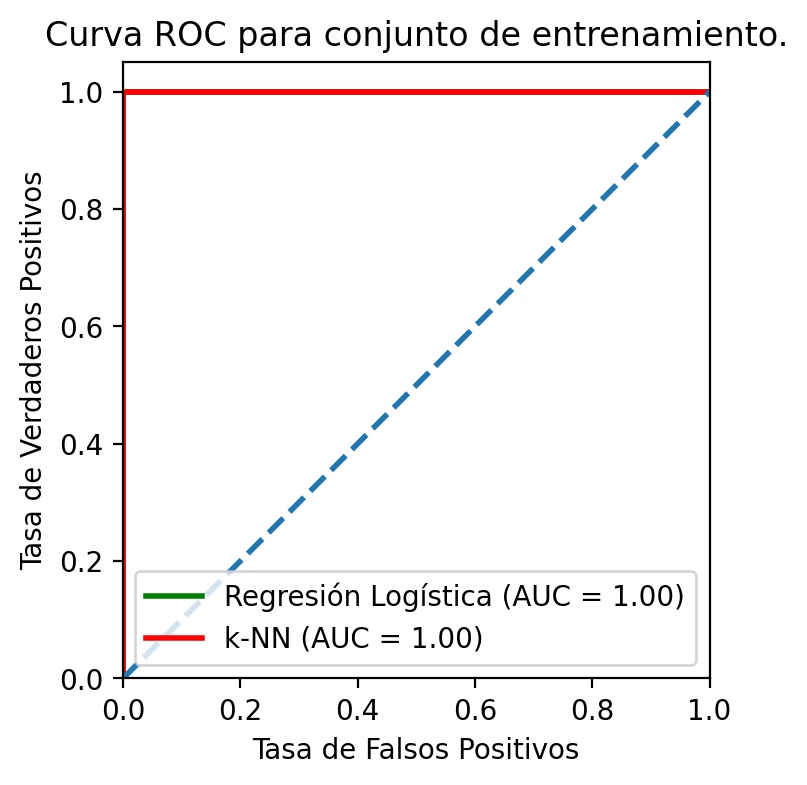

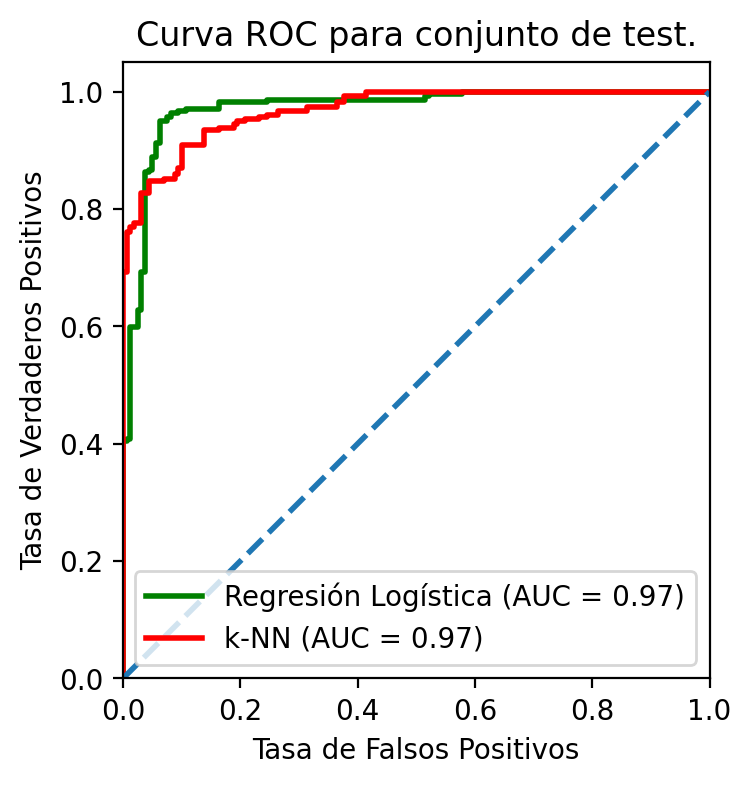

In [13]:
from sklearn import metrics

# Evaluamos la ROC en entrenamiento y test para ambos modelos
# Predicciones y curvas ROC

pred_train_LR = LR_model.predict_proba(X_train_tfidf)[:, 1]
pred_test_LR =  LR_model.predict_proba(X_test_tfidf)[:, 1]

pred_train_kNN = kNN_model.predict_proba(X_train_tfidf)[:, 1]
pred_test_kNN = kNN_model.predict_proba(X_test_tfidf)[:, 1]

# Calculamos ROC y AUC
fpr_train_LR, tpr_train_LR, _ = metrics.roc_curve(y_train, pred_train_LR, pos_label=1)
roc_auc_train_LR = metrics.roc_auc_score(y_train, pred_train_LR)
fpr_test_LR, tpr_test_LR, _ = metrics.roc_curve(y_test, pred_test_LR, pos_label=1)
roc_auc_test_LR = metrics.roc_auc_score(y_test, pred_test_LR)

fpr_train_kNN, tpr_train_kNN, _ = metrics.roc_curve(y_train, pred_train_kNN, pos_label=1)
roc_auc_train_kNN = metrics.roc_auc_score(y_train, pred_train_kNN)
fpr_test_kNN, tpr_test_kNN, _ = metrics.roc_curve(y_test, pred_test_kNN, pos_label=1)
roc_auc_test_kNN = metrics.roc_auc_score(y_test, pred_test_kNN)

print(f"k-NN AUC Train: {roc_auc_train_kNN:.4f}, k-NN AUC Test: {roc_auc_test_kNN:.4f}")
print(f"LR AUC Train: {roc_auc_train_LR:.4f}, LR AUC Test: {roc_auc_test_LR:.4f}")

# Dibuja la curva ROC para entrenamiento
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(fpr_train_LR, tpr_train_LR, color='green', lw=2, label=f'Regresión Logística (AUC = {roc_auc_train_LR:.2f})')
plt.plot(fpr_train_kNN, tpr_train_kNN, color='red', lw=2, label=f'k-NN (AUC = {roc_auc_train_kNN:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC para conjunto de entrenamiento.')
plt.legend(loc="lower right")
plt.show()

# Dibuja la curva ROC para test
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(fpr_test_LR, tpr_test_LR, color='green', lw=2, label=f'Regresión Logística (AUC = {roc_auc_test_LR:.2f})')
plt.plot(fpr_test_kNN, tpr_test_kNN, color='red', lw=2, label=f'k-NN (AUC = {roc_auc_test_kNN:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC para conjunto de test.')
plt.legend(loc="lower right")
plt.show()

- Analice las prestaciones al reducir el tamaño del diccionario.


In [14]:
#!pip install --upgrade gensim

In [15]:
# Create dictionary of tokens: the input is the preprocessed corpus
from gensim.corpora import Dictionary

# Tokenizar cada documento preprocesado en listas de palabras
norm_sent_tokens = [phrase.split() for phrase in phrases_filtered_prec]

# Creamos el diccionario con gensim
D_orig = Dictionary(norm_sent_tokens)

n_tokens = len(D_orig)
print('El diccionario completo contiene {} términos.'.format(n_tokens))

El diccionario completo contiene 3864 términos.


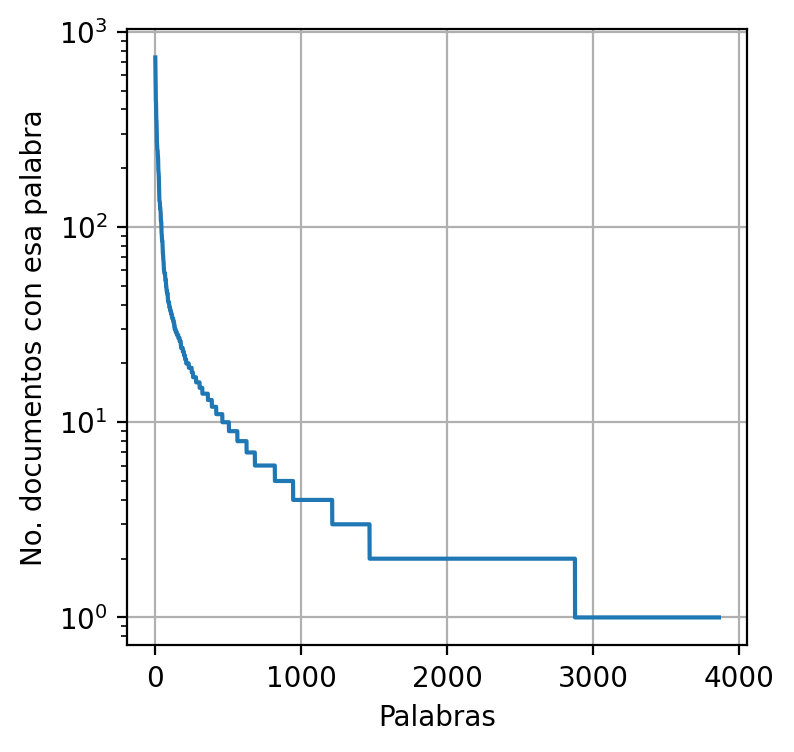

In [16]:
# Convertimos a array ordenada por aparición de términos
docs_con_palabra = np.array(sorted(D_orig.dfs.values(), reverse=True))

plt.figure(figsize=(4, 4))
ax = plt.gca()
plt.plot(docs_con_palabra)
plt.grid()
plt.xlabel('Palabras')
plt.ylabel('No. documentos con esa palabra')
plt.yscale('log')
plt.show()

Vamos a filtrar el diccionario de forma que eliminamos términos que no aparezcan al menos en 5 documentos y los que aparezcan en el 99% de los textos.

El diccionario filtrado contiene 945 términos.


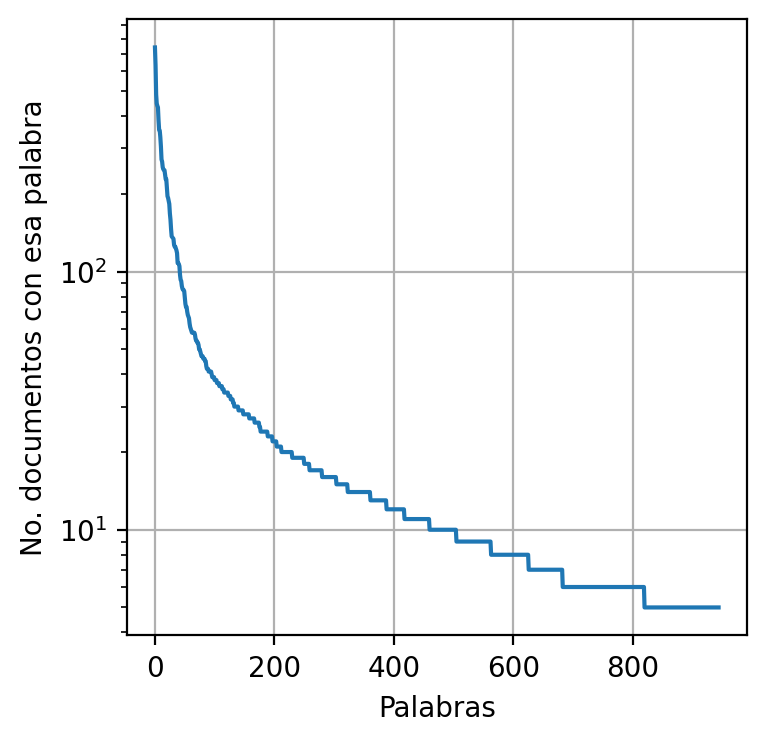

In [17]:
# Filtramos términos que no aparezcan al menos en 5 documentos y los que aparezcan en el 99%
no_below = 5
no_above = .99

D_filtered = Dictionary(norm_sent_tokens)
D_filtered.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D_filtered)
print('El diccionario filtrado contiene {} términos.'.format(n_tokens))

docs_con_palabra = np.array(sorted(D_filtered.dfs.values(), reverse=True))
plt.figure(figsize=(4, 4))
ax = plt.gca()
plt.plot(docs_con_palabra)
plt.grid()
plt.xlabel('Palabras')
plt.ylabel('No. documentos con esa palabra')
plt.yscale('log')
plt.show()

Generamos el TF-IDF con el diccionario reducido y lo convertimos a formato denso.

In [18]:
from gensim.matutils import corpus2dense, corpus2csc
from gensim.models import TfidfModel

# corpus_bow is a list, each element is the bow (sparse count) for every sentence
corpus_bow = [D_filtered.doc2bow(doc) for doc in norm_sent_tokens]

# TFIDF model
model = TfidfModel(corpus_bow)

# TFIDF parameterization of the corpus (TransformedCorpus gensim object)
corpus_tfidf = model[corpus_bow]

n_tokens = len(D_filtered)
num_docs = len(corpus_bow)

# Convert BoW representacion to numpy array (dense Nwords x Ndocs)
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs)

# Convert TFIDF representacion to numpy array (dense Nwords x Ndocs)
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs)

print(type(corpus_tfidf_dense))
print(corpus_tfidf_dense.shape)

<class 'numpy.ndarray'>
(945, 2180)


Repetimos la pertición de los datos en entrenamiento y test, con las mismas proporciones.

In [19]:
X = corpus_tfidf_dense.T
y = df_prep['Label']

X_train_reducedvocab, X_test_reducedvocab, y_train_reducedvocab, y_test_reducedvocab = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nTamaños de los datos de entrenamiento:')
print(X_train_reducedvocab.shape)
print(y_train_reducedvocab.shape)

print('\nTamaños de los datos de test:')
print(X_test_reducedvocab.shape)
print(y_test_reducedvocab.shape)


Tamaños de los datos de entrenamiento:
(1744, 945)
(1744,)

Tamaños de los datos de test:
(436, 945)
(436,)


Entrenamos modelo de Regresión Logística con validación cruzada de los hiperparámetros.

In [20]:
# Entrenamos modelo LR con validación cruzada 10-fold para hiperparámetro C
rango_C = np.logspace(-3, 3, 10)  # Rango C en escala logarítmica (base 10). Esto es, 20 puntos desde 10^3, a 10^3.
diccionario_parametros = [{'C': rango_C}]
nfold = 10 # Número de particiones train/validación

LR_model_reducedvocab  = GridSearchCV(estimator=LR(penalty='l2'),param_grid=diccionario_parametros,cv=nfold)

LR_model_reducedvocab.fit(X_train_reducedvocab, y_train_reducedvocab)

print("Entrenamiento finalizado con vocabulario reducido!\nEl mejor parámetro C es {0:.2f}".format( LR_model_reducedvocab.best_params_['C']))

Entrenamiento finalizado con vocabulario reducido!
El mejor parámetro C es 46.42


Entrenamos modelo k-NN con validación cruzada de los hiperparámetros.

In [21]:
# Parameters
K_max = 30
rango_K = np.arange(1, K_max+1)
nfold = 10

# Diccionario de parámetros
diccionario_parametros = [{'n_neighbors': rango_K,'weights':['uniform','distance']}]
kNN_model_reducedvocab = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=diccionario_parametros,cv=nfold)
kNN_model_reducedvocab.fit(X_train_reducedvocab, y_train_reducedvocab)

print("Entrenamiento finalizado con vocabulario reducido!\nEl mejor parámetro k es {}".format(kNN_model.best_params_['n_neighbors']))

Entrenamiento finalizado con vocabulario reducido!
El mejor parámetro k es 23


Evaluamos la ROC y AUC en entrenamiento y test para ambos modelos.

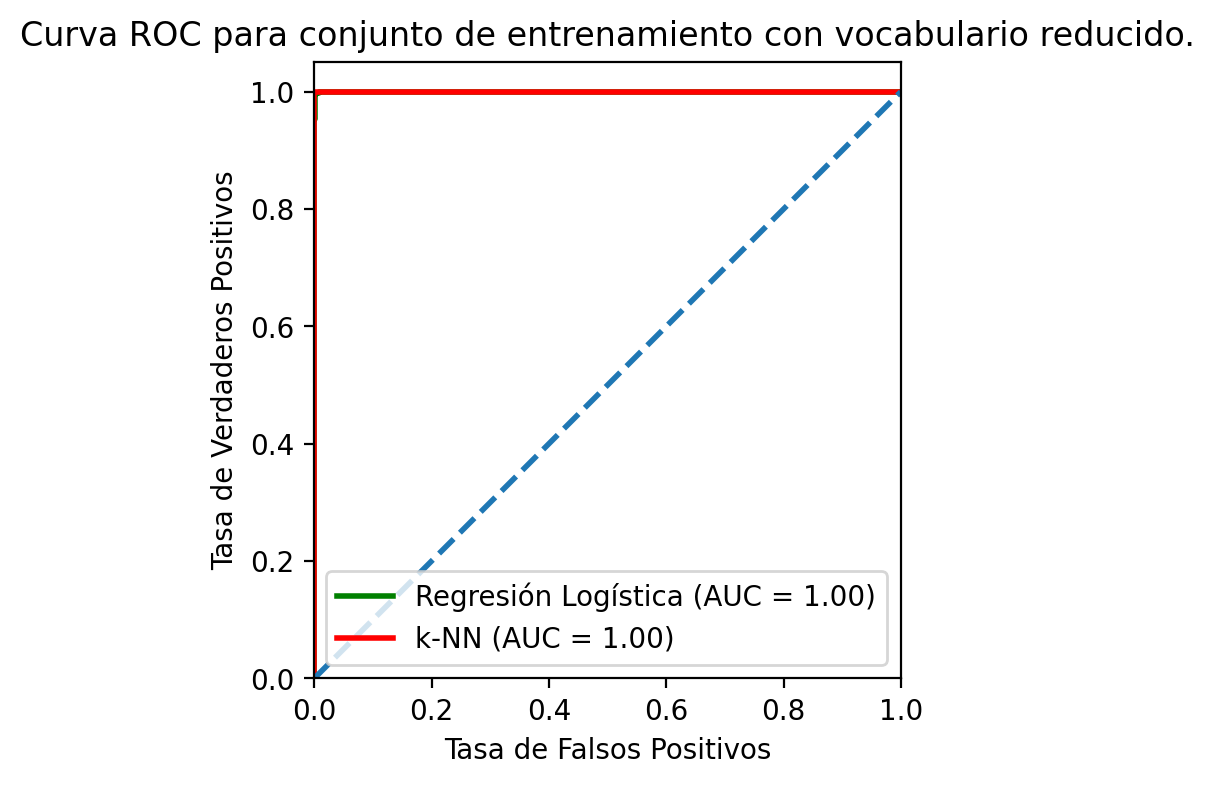

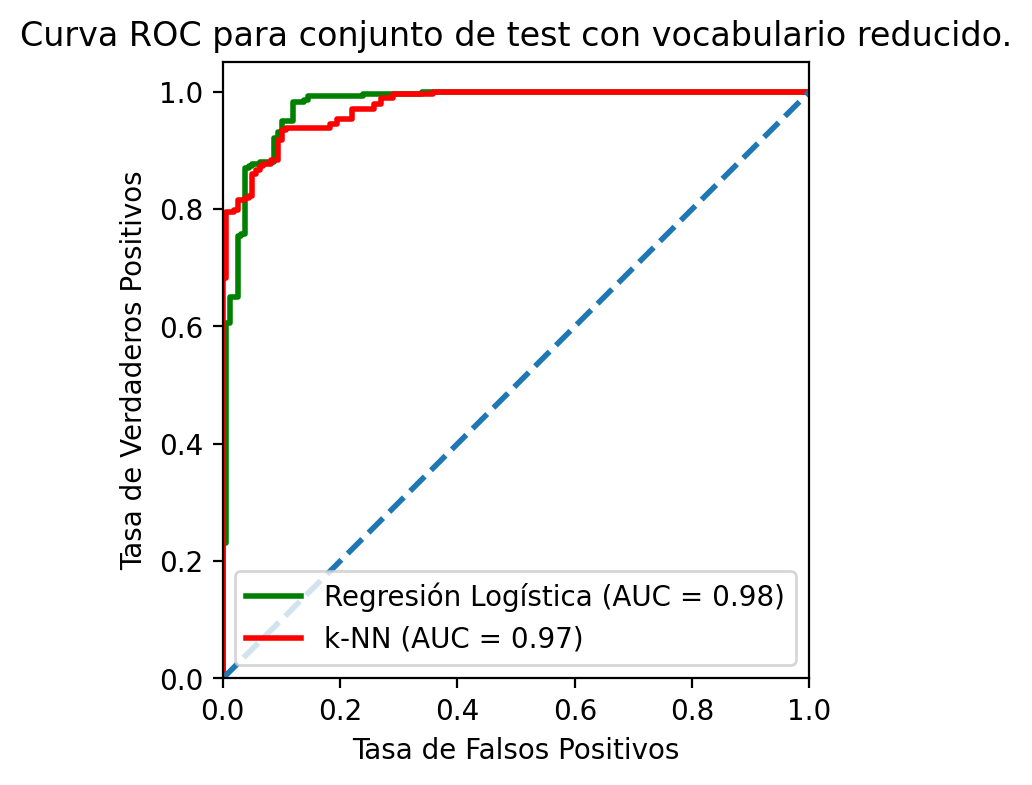

Prestaciones antes de reducir el vocabulario:
k-NN AUC Train: 1.0000, k-NN AUC Test: 0.9684
LR AUC Train: 1.0000, LR AUC Test: 0.9712

Prestaciones tras reducir el vocabulario:
k-NN AUC Train with reduced vocabulary: 1.0000, k-NN AUC Test with reduced vocabulary: 0.9748
LR AUC Train with reduced vocabulary: 0.9999, LR AUC Test with reduced vocabulary: 0.9757




In [22]:
pred_train_LR_reducedvocab = LR_model_reducedvocab.predict_proba(X_train_reducedvocab)[:, 1]
pred_test_LR_reducedvocab = LR_model_reducedvocab.predict_proba(X_test_reducedvocab)[:, 1]

pred_train_kNN_reducedvocab = kNN_model_reducedvocab.predict_proba(X_train_reducedvocab)[:, 1]
pred_test_kNN_reducedvocab = kNN_model_reducedvocab.predict_proba(X_test_reducedvocab)[:, 1]

fpr_train_LR_reducedvocab, tpr_train_LR_reducedvocab, _ = metrics.roc_curve(y_train, pred_train_LR_reducedvocab, pos_label=1)
roc_auc_train_LR_reducedvocab = metrics.roc_auc_score(y_train, pred_train_LR_reducedvocab)
fpr_test_LR_reducedvocab, tpr_test_LR_reducedvocab, _ = metrics.roc_curve(y_test, pred_test_LR_reducedvocab, pos_label=1)
roc_auc_test_LR_reducedvocab = metrics.roc_auc_score(y_test, pred_test_LR_reducedvocab)

fpr_train_kNN_reducedvocab, tpr_train_kNN_reducedvocab, _ = metrics.roc_curve(y_train, pred_train_kNN_reducedvocab, pos_label=1)
roc_auc_train_kNN_reducedvocab = metrics.roc_auc_score(y_train, pred_train_kNN_reducedvocab)
fpr_test_kNN_reducedvocab, tpr_test_kNN_reducedvocab, _ = metrics.roc_curve(y_test, pred_test_kNN_reducedvocab, pos_label=1)
roc_auc_test_kNN_reducedvocab = metrics.roc_auc_score(y_test, pred_test_kNN_reducedvocab)

# Dibuja la curva ROC para entrenamiento
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(fpr_train_LR_reducedvocab, tpr_train_LR_reducedvocab, color='green', lw=2, label=f'Regresión Logística (AUC = {roc_auc_train_LR_reducedvocab:.2f})')
plt.plot(fpr_train_kNN_reducedvocab, tpr_train_kNN_reducedvocab, color='red', lw=2, label=f'k-NN (AUC = {roc_auc_train_kNN_reducedvocab:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC para conjunto de entrenamiento con vocabulario reducido.')
plt.legend(loc="lower right")
plt.show()

# Dibuja la curva ROC para test
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(fpr_test_LR_reducedvocab, tpr_test_LR_reducedvocab, color='green', lw=2, label=f'Regresión Logística (AUC = {roc_auc_test_LR_reducedvocab:.2f})')
plt.plot(fpr_test_kNN_reducedvocab, tpr_test_kNN_reducedvocab, color='red', lw=2, label=f'k-NN (AUC = {roc_auc_test_kNN_reducedvocab:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC para conjunto de test con vocabulario reducido.')
plt.legend(loc="lower right")
plt.show()

print('Prestaciones antes de reducir el vocabulario:')
print(f"k-NN AUC Train: {roc_auc_train_kNN:.4f}, k-NN AUC Test: {roc_auc_test_kNN:.4f}")
print(f"LR AUC Train: {roc_auc_train_LR:.4f}, LR AUC Test: {roc_auc_test_LR:.4f}")

print('\nPrestaciones tras reducir el vocabulario:')
print(f"k-NN AUC Train with reduced vocabulary: {roc_auc_train_kNN_reducedvocab:.4f}, k-NN AUC Test with reduced vocabulary: {roc_auc_test_kNN_reducedvocab:.4f}")
print(f"LR AUC Train with reduced vocabulary: {roc_auc_train_LR_reducedvocab:.4f}, LR AUC Test with reduced vocabulary: {roc_auc_test_LR_reducedvocab:.4f}\n\n")


- En el caso de regresión logística, identifique las 10 palabras más relevantes para el clasificador, tanto para el caso de vocabulario completo como reducido.

In [23]:
import numpy as np

LR_best_model = LR_model.best_estimator_
coeficientes = LR_best_model.coef_.flatten()
indices_palabras_completas = np.argsort(np.abs(coeficientes))[-10:]
principales_palabras_vocabulario_completo = [D_orig[i] for i in indices_palabras_completas]

print("Principales 10 palabras para el modelo de Regresión Logística (vocabulario completo):")
for k in range(10):
    print(principales_palabras_vocabulario_completo[k])

LR_best_model_reducido = LR_model_reducedvocab.best_estimator_
coeficientes_reducidos = LR_best_model_reducido.coef_.flatten()
indices_palabras_reducidas = np.argsort(np.abs(coeficientes_reducidos))[-10:]
principales_palabras_vocabulario_reducido = [D_filtered[i] for i in indices_palabras_reducidas]
print("Principales 10 palabras para el modelo de Regresión Logística (vocabulario reducido):")
for k in range(10):
    print(principales_palabras_vocabulario_reducido[k])

Principales 10 palabras para el modelo de Regresión Logística (vocabulario completo):
size
nonwoven
stq1v
rapid
eur159
10.6
36.8
le
productional
48.31
Principales 10 palabras para el modelo de Regresión Logística (vocabulario reducido):
strike
low
30
decline
increase
grow
drop
fall
rise
decrease


- Finalmente, clasifique los textos etiquetados como neutrales y estudie a qué categoría se suelen clasificar, representando un diagrama de barras con las prediccions resultantes.

(3537, 2965)


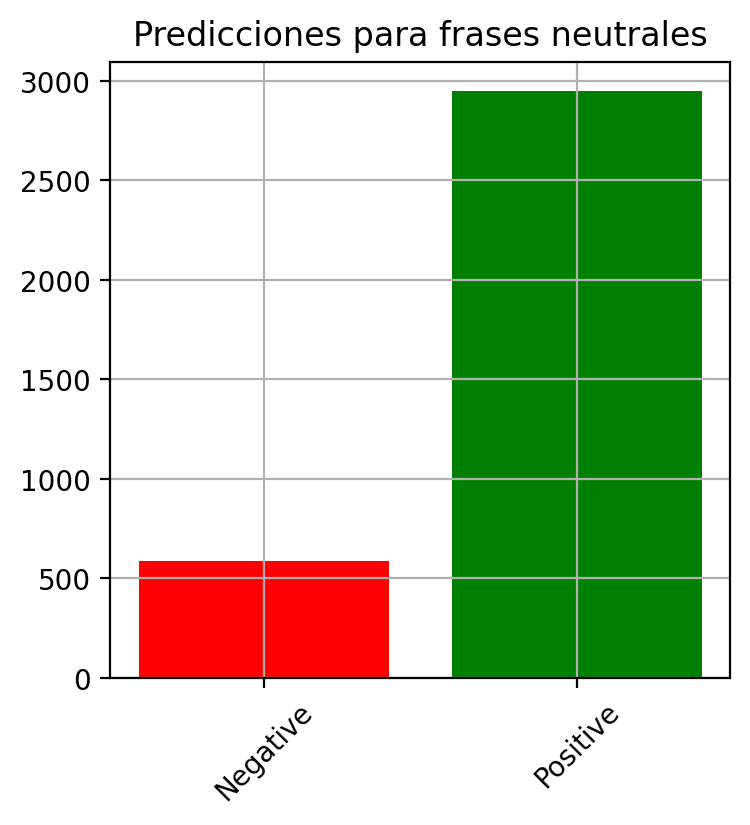

In [24]:
# Recopilamos las frases neutrales (strings)
phrases_neutral = df[df['Opinion'] == 'neutral']['Phrase']

# Preprocesamos las neutral phrases de igual manera que las positivas y negativas
phrases_neutral_prec = []
for phrase in phrases_neutral:
    doc = nlp(phrase)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    phrases_neutral_prec.append(" ".join(tokens))

# Creamos la vectorización TFIDF de los datos
model = TfidfVectorizer()
model.fit(X_train)

X_neutral_tfidf = model.transform(phrases_neutral_prec)
print(X_neutral_tfidf.shape)
LR_model.best_estimator_
pred_neutral_LR = LR_model.best_estimator_.predict(X_neutral_tfidf)

# Recopilamos el conteo de predicts
unique, counts = np.unique(pred_neutral_LR, return_counts=True)
pred_counts = dict(zip(unique, counts))

fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(pred_counts.keys(), pred_counts.values(), color=['red', 'green'])
ax.set_xticks([0, 1])
ax.set_title('Predicciones para frases neutrales')
ax.set_xticklabels(['Negative', 'Positive'], rotation=45)
ax.grid()
plt.show()